# **Employee Burnout Prediction**


Employee burnout is a state of physical, emotional and mental exhaustion caused by excessive and prolonged stress. It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance. In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

 we will be exploring the use of regression techniques to predict employee burnout. By analyzing a dataset containing various factors that may contribute to burnout such as workload, mental fatigue job and work-life balance, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.

## **Dataset: Are Your Employees Burning Out?**
This [dataset](https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out?select=train.csv) consists of 9 columns as follows:

* **Employee ID**: The unique ID allocated for each employee **(example: fffe390032003000)**
* **Date of Joining**: The date-time when the employee has joined the organization **(example: 2008-12-30)**
* **Gender**: The gender of the employee **(Male/Female)**
* **Company Type**: The type of company where the employee is working **(Service/Product)**
* **WFH Setup Available**: Is the work from home facility available for the employee **(Yes/No)**
* **Designation**: The designation of the employee of work in the organization.
In the **range of [0.0, 5.0]** bigger is higher designation.
* **Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours.
In the **range of [1.0, 10.0]** (higher means more resource)
* **Mental Fatigue Score**: The level of fatigue mentally the employee is facing.
In the **range of [0.0, 10.0]** where 0.0 means no fatigue and 10.0 means completely fatigue.
* **Burn Rate**: The value we need to predict for each employee telling the rate of Bur out while working.
In the **range of [0.0, 1.0]** where the higher the value is more is the burn out.

# **IMPORTING NECESSARY LIBRARIES**

In [89]:
# Importing neccesary liabries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [90]:
!pip install plotly_express
import plotly.express as px  # Import the Plotly Express library


## **Burnout Analysis Using AI and ML Employee**
 Employee burnout is a critical issue affecting productivity, health, and overall workplace morale. By leveraging Artificial Intelligence (AI) and Machine Learning (ML) techniques, organizations can predict, analyze, and mitigate burnout, leading to improved employee well-being and enhanced performance.



  # **LOAD DATASET**

In [91]:
data= pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

# **DATA OVERVIEW**

In [4]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [5]:

data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [8]:
data['Date of Joining']=pd.to_datetime(data["Date of Joining"])

In [9]:
data.shape

(22750, 9)

In [10]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [11]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [12]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [13]:
data.isnull()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22745,False,False,False,False,False,False,False,True,False
22746,False,False,False,False,False,False,False,False,False
22747,False,False,False,False,False,False,False,True,False
22748,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [15]:

data.isnull().sum().values.sum()

4622

In [16]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22745    False
22746    False
22747    False
22748    False
22749    False
Length: 22750, dtype: bool

In [17]:
data.duplicated().sum()

0

In [18]:
for i, col in enumerate(data.columns):
    print(f"\n\n{data[col].unique()}")
    print(f"\n{data[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: count, Length: 22750, dtype: int64




<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-03 00

# **Exploratory Data Analysis**


There are NaN values on our target ("Burn Rate") and also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe.

data.corr(numeric_only=True)['Burn Rate'][:-1]

These two variables are strongly correlated with target variable, therefore , important to estimate it.

In [25]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

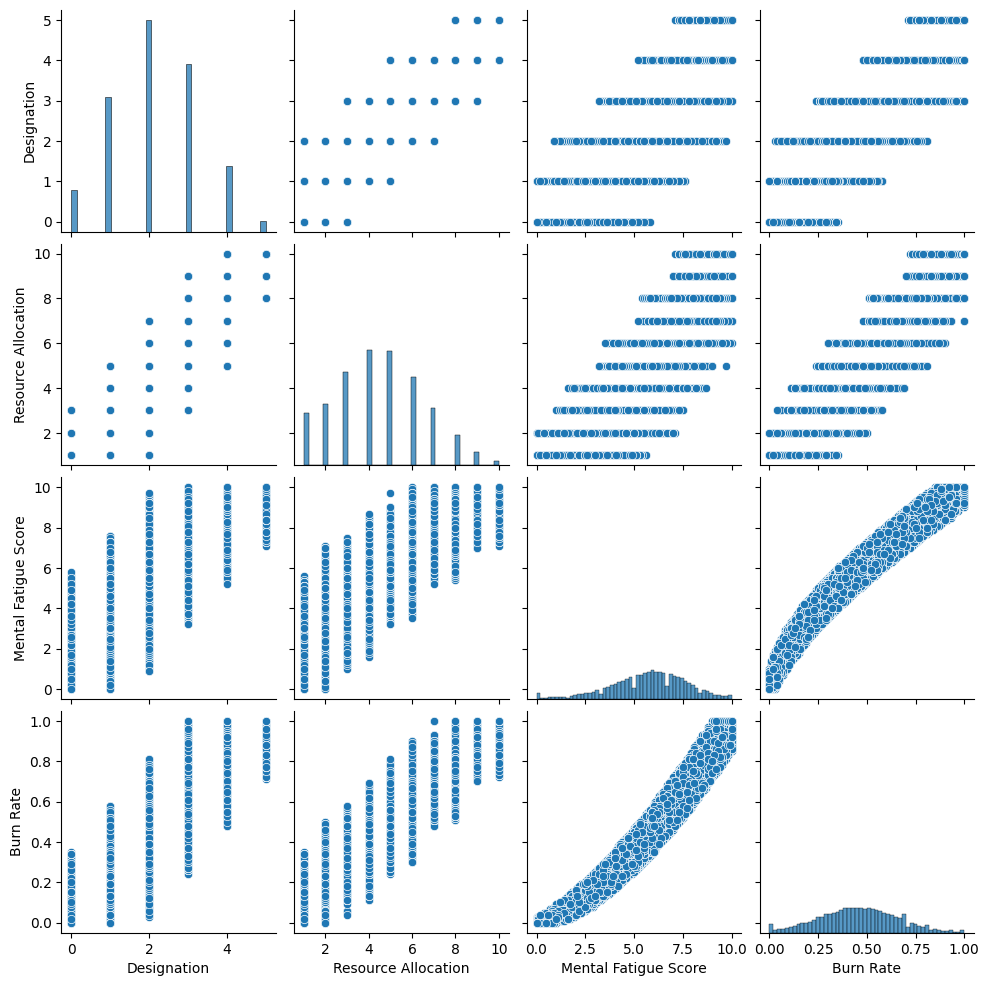

In [26]:

sns.pairplot(data)
plt.show()

Drop off all observations with NaN values of our dataframe.

In [20]:
data = data.dropna()


In [21]:
data.shape

(18590, 9)

Analyzing what type of data is each variable.

In [22]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

The values that each variable contains.



The employees ID doesn't provide any useful information and, therefore, they must be dropped.

In [29]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
print({ c : data_obj[c].unique()[:10] for c in data_obj.columns})

{'Gender': array(['Female', 'Male'], dtype=object), 'Company Type': array(['Service', 'Product'], dtype=object), 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


In [23]:
data = data.drop('Employee ID', axis = 1)


In [24]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29


In [38]:
# check the skewness of the attributes
intFloatdata = data.select_dtypes([int, float])  # Use built-in int and float
for i, col in enumerate(intFloatdata.columns):
    if (intFloatdata[col].skew() >= 0.1):
        print("\n",col, "feature is Positively Skewed and value is: ", intFloatdata[col].skew())
    elif (intFloatdata[col].skew() <=-0.1):
        print("In",col, "feature is Negtively Skewed and value is: ", intFloatdata[col].skew())
    else:
        print("In",col, "feature is Hormally Distributed and value is: ", intFloatdata[col].skew())

In Designation feature is Hormally Distributed and value is:  0.0829654522489255

 Resource Allocation feature is Positively Skewed and value is:  0.20014093647853798
In Mental Fatigue Score feature is Negtively Skewed and value is:  -0.4384329002556941
In Burn Rate feature is Hormally Distributed and value is:  0.0411392465041044
In Days feature is Hormally Distributed and value is:  -0.012234927552360888


In [39]:
 # Replace the null values with mean
data['Resource Allocation'].fillna(data['Resource Allocation'].mean(),inplace=True)
data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].mean(),inplace=True)
data['Burn Rate'].fillna(data['Burn Rate'].mean(),inplace=True)

In [40]:
# check for null values
data.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
Days                    0
dtype: int64

<h3>Checking the correlation of Date of Joining with Target variable

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

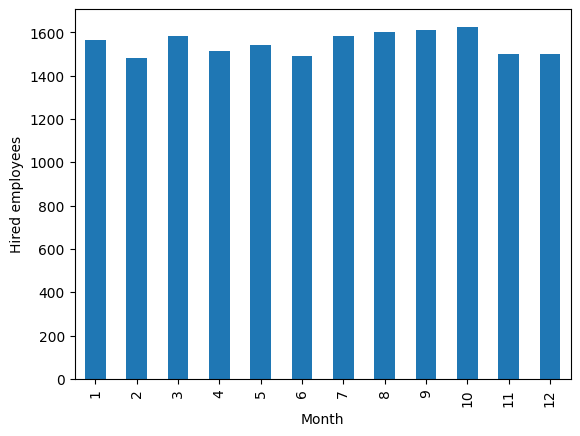

In [32]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

# Specify 'ns' (nanoseconds) as the time unit
data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")

data_month["Date of Joining"].groupby(
    data_month['Date of Joining'].dt.month
).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")

 The date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with de days worked

In [34]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
# Specify 'ns' (nanoseconds) for the datetime conversion
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [36]:
# Select only numerical columns before calculating correlations
numerical_data = data.select_dtypes(include=['number'])
numerical_data.corr()['Burn Rate']

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [37]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

<ipython-input-41-fdf073b991b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x="Gender", data=data, palette="magma")


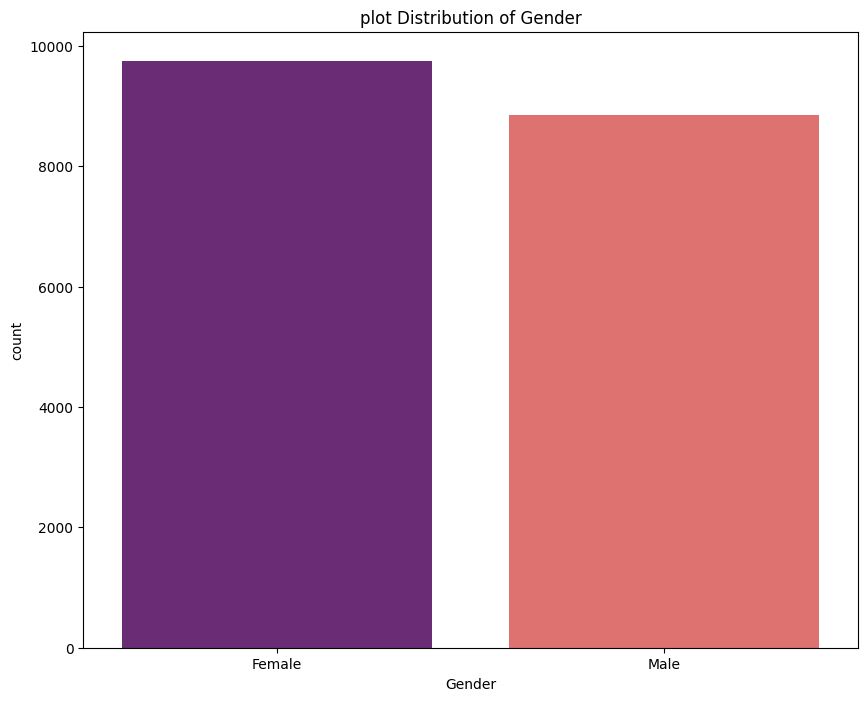

In [41]:
#Count plot distribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot (x="Gender", data=data, palette="magma")
plt.title("plot Distribution of Gender")
plt.show()

<ipython-input-44-f06bf525aaaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Company Type", data=data, palette="dark:salmon_r") # Replace with the actual column name


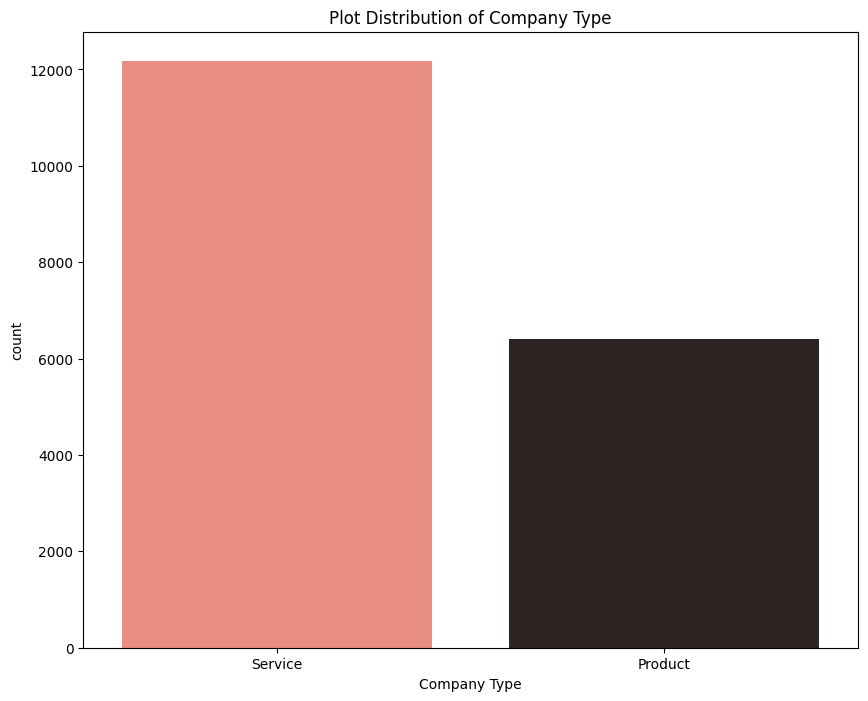

In [44]:
# Count plot distribution of "WFH Setup Available"
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=data, palette="dark:salmon_r") # Replace with the actual column name
plt.title("Plot Distribution of Company Type")
plt.show()

<ipython-input-42-2d705021a063>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="WFH Setup Available", data=data, palette="dark:salmon_r") # Replace with the actual column name


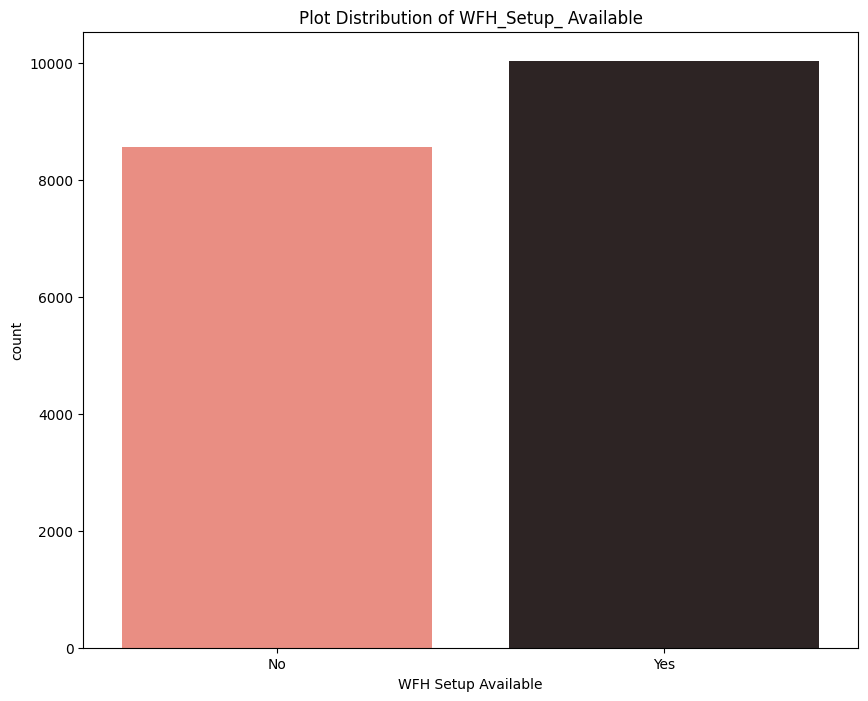

In [42]:
# Count plot distribution of "WFH Setup Available"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=data, palette="dark:salmon_r") # Replace with the actual column name
plt.title("Plot Distribution of WFH_Setup_ Available")
plt.show()

In [45]:
# Count-plot Distribution of attributes with the help of Histogram
burn_st=data.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
    fig = px.histogram(burn_st, x=col, title="plot Distribution of "+col, color_discrete_sequence=["indianred"])
    fig.update_layout(bargap=0.2)
    fig.show()

In [47]:
# plot distribution of Burn rate on the basis of Designation
fig = px.line(data, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [48]:
#Plot distribution of Burn rate on the basis of Gender
fig = px.line(data, y="Burn Rate", color="Gender", title="Burn rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1) # Change 'Gender' to 'GenderLabel'
fig.update_layout(bargap=0.2)
fig.show()

In [92]:
#Plot distribution of Burn rate on the basis of Company Type
fig = px.line(data, y="Burn Rate", color="Company Type", title="Burn rate on the basis of Company Type",color_discrete_sequence=px.colors.qualitative.Pastel1) # Change 'Gender' to 'GenderLabel'
fig.update_layout(bargap=0.2)
fig.show()

In [50]:
#Plot distribution of Burn rate on the basis of WFH Setup Available
fig = px.line(data, y="Burn Rate", color="WFH Setup Available", title="Burn rate on the basis of WFH Setup Available",color_discrete_sequence=px.colors.qualitative.Pastel1) # Change 'Gender' to 'GenderLabel'
fig.update_layout(bargap=0.2)
fig.show()

In [51]:
# Plot distribution of mental fatigue score on the basis of Designation
fig = px.line(data, y="Mental Fatigue Score", color="Designation", title="Mental fatigue vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

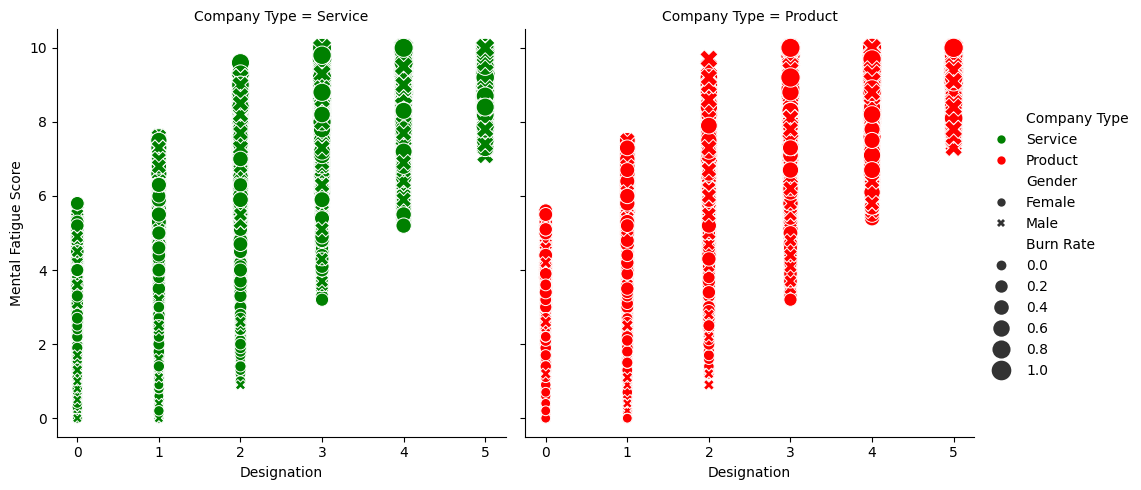

In [52]:
# Plot Distribution of "Designation vs mental fatigue" as per Company type , Burn rate and Gender
sns.relplot(
    data=data, x="Designation", y="Mental Fatigue Score", col="Company Type",
hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes=(50, 200)
)

We observed that there is no strong correlation between Date of Joining and Burn Rate.So, we are dropping the column Date of Joining.

In [53]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [54]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


Now  analysing the categorical variables


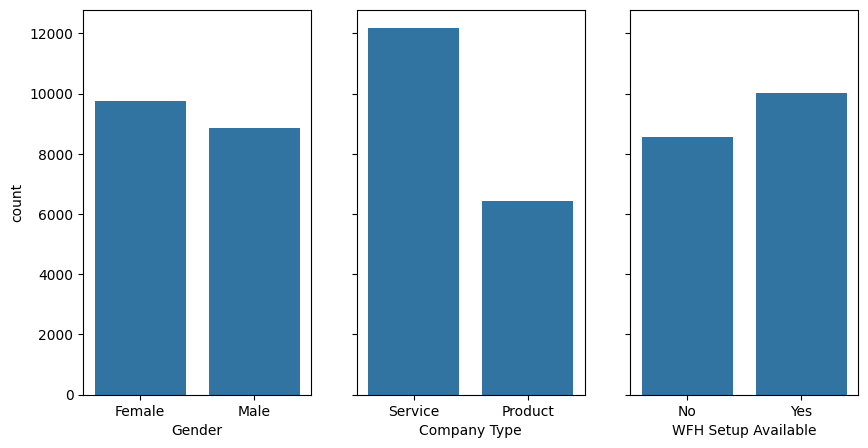

In [55]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.

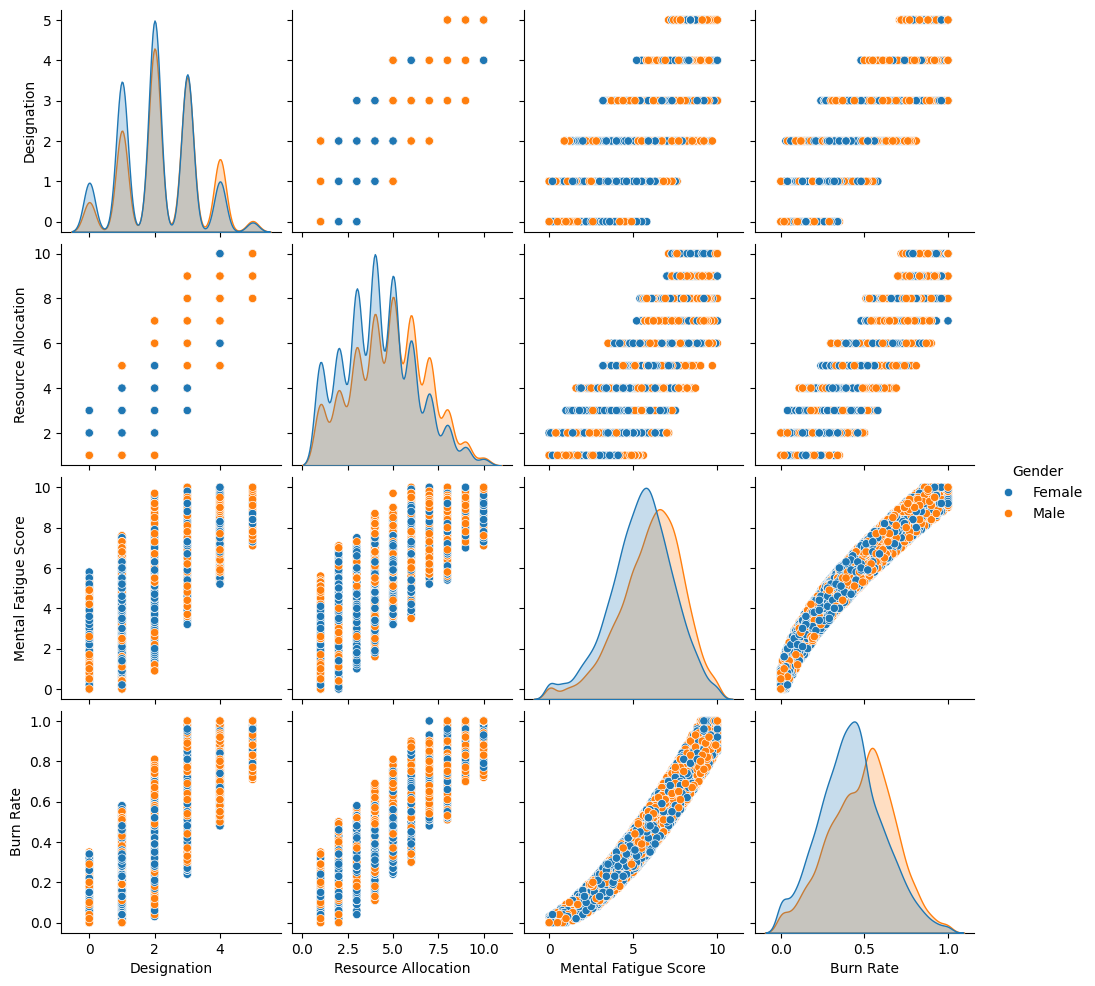

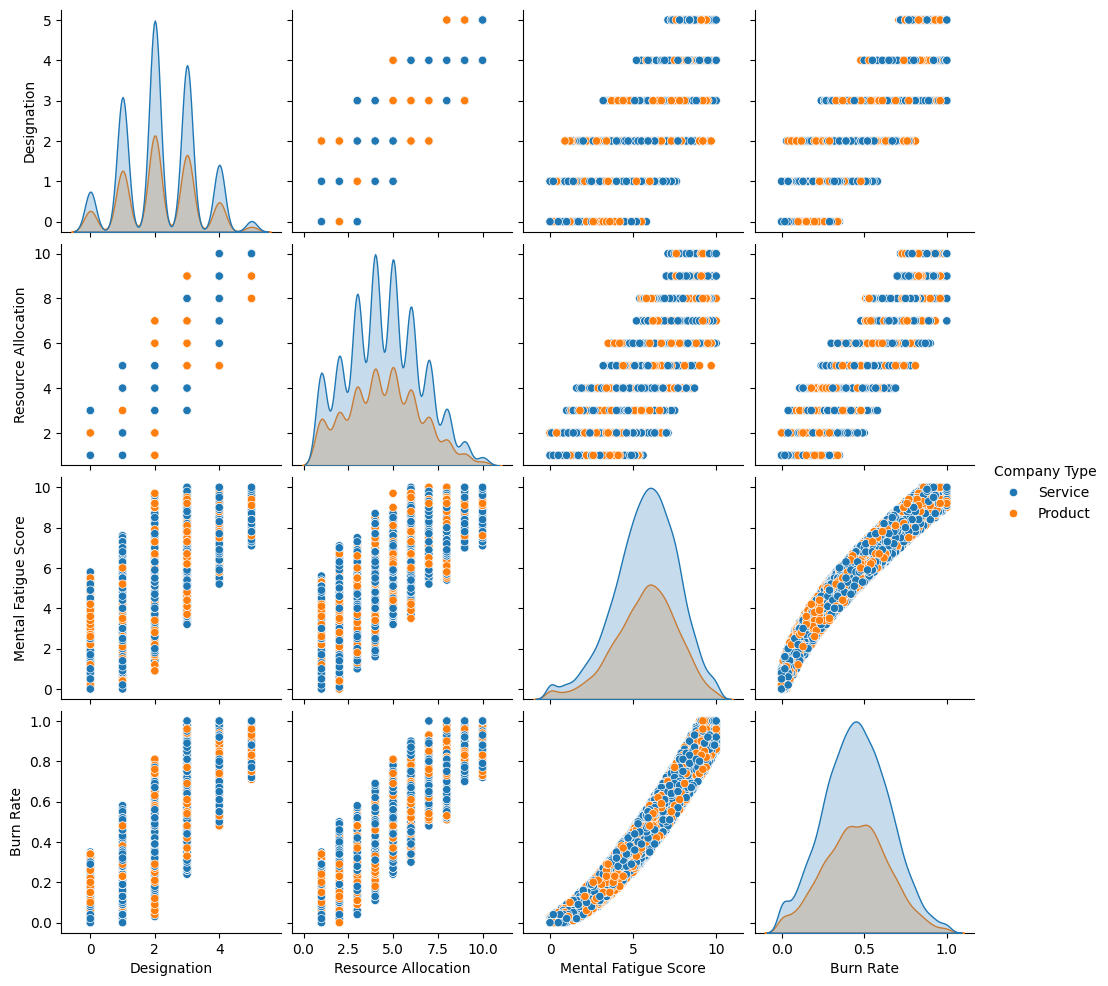

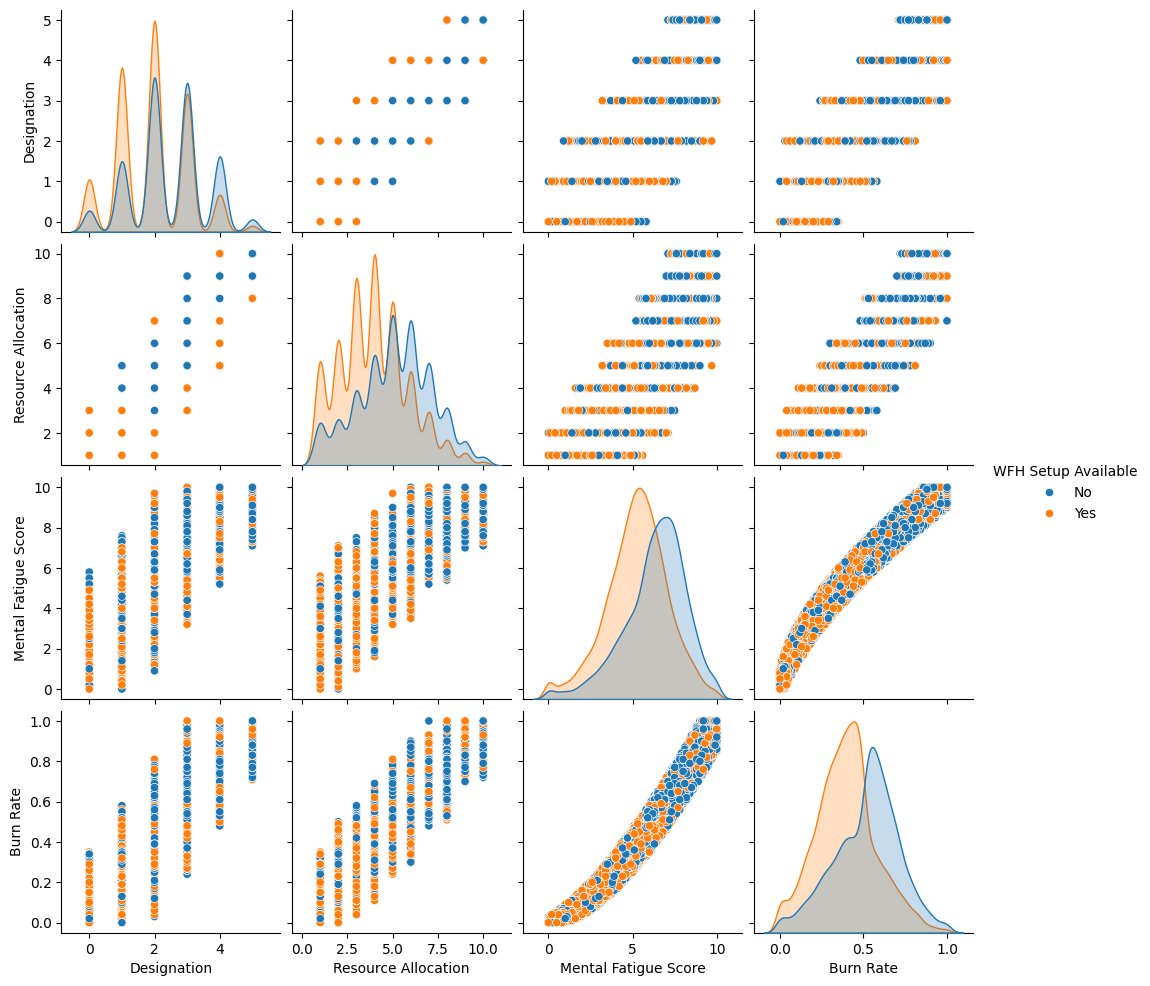

In [56]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

In [57]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

### One-Hot Encoding for categorical features

In [58]:
# Check if the columns exist before applying get_dummies
if all(col in data.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

# **Preprocessing**

In [59]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


#### IMPLEMENTING PRINCIPAL COMPONANT ANALYSIS (PCA)

In [82]:
# Principle component Analyssis
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(X)
print("PCA shape of X is:",x_pca.shape, "and orignal shape is:", X.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PcA is:", pca.n_components_)

PCA shape of X is: (18590, 4) and orignal shape is: (18590, 6)
% of importance of selected features is: [0.81523561 0.09147675 0.02548865 0.02334159]
The number of features selected through PcA is: 4


In [83]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [84]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [85]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

# **Model Building**


## Linear Regression

In [86]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [87]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


In [65]:
feature_names = X.columns.tolist()
feature_names


['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

## Support Vector Machine(Linear Kernel)

In [68]:
# Import the necessary class
from sklearn.svm import LinearSVR

# Create an instance of LinearSVR and set 'dual' to True or False based on your data
# If number of samples > number of features, set dual=True
# If number of samples < number of features, set dual=False
SVMLinear = LinearSVR(dual=True, max_iter=10000)  # You can adjust 'max_iter' as needed

# Fit the model
SVMLinear.fit(X_train, y_train)

LinearSVR(max_iter=10000)

In [69]:
#Support Vector Machine (Linear Kernel) Performance Metrics
print("Support Vector Machine (Linear Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMLinear.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Support Vector Machine (Linear Kernel) Performance Metrics

Mean Squared Error: 0.0031988174590541546
Root Mean Squared Error: 0.05655808924507753
Mean Absolute Error: 0.04591412114797745
R-squared Score: 0.9177468280779713


## Support Vector Machine (RBF Kernel)

In [71]:
# Import the necessary class
from sklearn.svm import SVR

SVMRbf = SVR()
SVMRbf.fit(X_train, y_train)

SVR()

In [72]:
#Support Vector Machine (RBF Kernel) Performance Metrics
print("Support Vector Machine (RBF Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMRbf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Support Vector Machine (RBF Kernel) Performance Metrics

Mean Squared Error: 0.00341204574122986
Root Mean Squared Error: 0.058412719002199
Mean Absolute Error: 0.04962241383880883
R-squared Score: 0.9122639573681112


## Random Forest Reggressor

In [75]:
# Import the necessary class
from sklearn.ensemble import RandomForestRegressor

RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [76]:

#RandomForestRegressor Performance Metrics
print("RandomForestRegressor Performance Metrics\n")
# Make predictions on the test set
y_pred = RandomForest.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

RandomForestRegressor Performance Metrics

Mean Squared Error: 0.0033769338510908284
Root Mean Squared Error: 0.058111391749732066
Mean Absolute Error: 0.045908652578045404
R-squared Score: 0.9131668111173735


## Decision Tree Regressor

In [77]:
#from sklearn.linear_model import DecisionTreeRegressor

# Create an instance of the Decision Tree Regressor class
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [78]:
#Decision Tree regressing Model Performance Metrics

print("Decision Tree Regression Model Performance Metrics:\n")

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Decision Tree Regression Model Performance Metrics:

Mean Squared Error: 0.003845638947273463
Root Mean Squared Error: 0.06201321590817124
Mean Absolute Error: 0.04826613695578272
R-squared Score: 0.9011147070662594


## AdaBoost regressor

In [79]:
# AdaBoost regressor
#from sklearn.linear_model import AdaBoost Regressor

# Create an instance of the AdaBoost regressor class
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(X_train, y_train)



AdaBoostRegressor()

In [80]:
# AdaBoost regressor Model Performance Metrics

print(" AdaBoost regressor Model Performance Metrics:\n")

# Make predictions on the test set
train_pred_adaboost = abr_model.predict(X_train)
train_r2 = r2_score(y_train, train_pred_adaboost)
test_pred_adaboost = abr_model.predict(X_test)
test_r2 = r2_score(y_test, test_pred_adaboost)

print("Accuracy score of train data: "+str(round(100*train_r2, 4))+" %")
print("Accuracy score of test data: "+str(round(100*test_r2, 4))+" %")

 AdaBoost regressor Model Performance Metrics:

Accuracy score of train data: 90.2128 %
Accuracy score of test data: 90.0819 %


Based on the evaluation metrics, I determined that the Linear Regression model is the best for predicting burnout analysis.

It has the lowest mean squared error, root mean squared error, and mean absolute error, indicating better accuracy and precision in its predictions. Additionally, it has the highest R-squared score, indicating a good fit to the data and explaining a higher proportion of the variance in the target variable.

Therefore, I am choosing this model for deployment.